## Final Experiment for VND

In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_utils import plot_two_solutions
import matplotlib.pyplot as plt 

from ioutils import parse_input
from ioutils import parse_solutions
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import allocate_paths
from utils import get_nodes
from utils import get_total_cost
from utils import get_flow_from_paths
import cplex_utils
import graph_utils as graph_utils

from ioutils import get_comparison_table_file_name
from utils import get_latest_commit_id
from utils import get_comparison_table
import pandas as pd

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = "./data/AP/generated/"
SOLUTIONS_FILE ='/home/ubuntu/VNS_for_UMApHMP/data/AP/Solutions-UMApHMP.txt'

In [3]:
from vns import get_initial_solution_random
from vns import get_initial_solution_robust
from vns import get_initial_solution_circle

from vns import local_search_best_improvement
from vns import local_search_first_improvement


from vns import basic_VNS
from vns import deterministic_VNS

from utils import NEIGHBOURHOOD_TYPES

from ioutils import get_comparison_table_file_name
from utils import get_latest_commit_id

In [4]:
NUMBER_OF_PROBLEMS = 45
OUTPUT_FILE_NAME = get_comparison_table_file_name('final_comparison_vnd', str(NUMBER_OF_PROBLEMS), get_latest_commit_id())

In [5]:
def best_ls(solution, neighbourhood_type, use_c):
    return local_search_best_improvement(solution, neighbourhood_type, use_c)

def first_ls(solution, neighbourhood_type, use_c):
    return local_search_first_improvement(solution, neighbourhood_type, use_c)

def random_init(n, p, distances, nodes_coor):
    return get_initial_solution_random(n, p, distances, nodes_coor)

def min_max_init(n, p, distances, nodes_coor):
    return get_initial_solution_robust(n, p, distances, nodes_coor)

def angle_init(n, p, distances, nodes_coor):
    return get_initial_solution_circle(n, p, distances, nodes_coor)


In [6]:
# ------- algorithm parameters --------
# shaking_intensity = [0, 0.5]
initializations = [random_init, min_max_init, angle_init]
local_searches = [best_ls, first_ls]
max_iters = [10]
kmax_options = [1,2,3]

In [7]:
methods = []
names = []

for ls in local_searches:
    for kmax in kmax_options:
        for max_iter in max_iters:
            methods.append(lambda problem, initial_solution: deterministic_VNS(problem, initial_solution=initial_solution, local_search=ls, neighbourhood_types=NEIGHBOURHOOD_TYPES[:kmax], max_iter=max_iter))
            names.append(" ".join(["VND", ls.__name__, "kmax="+str(kmax), "max_iter="+str(max_iter)]))


In [8]:
len(names)

6

In [9]:
names[:5]

['VND best_ls kmax=1 max_iter=10',
 'VND best_ls kmax=2 max_iter=10',
 'VND best_ls kmax=3 max_iter=10',
 'VND first_ls kmax=1 max_iter=10',
 'VND first_ls kmax=2 max_iter=10']

In [10]:
comparison_table = get_comparison_table(
    methods,
    names,
    DATASET, INPUT_DIRECTORY, SOLUTIONS_FILE,
    from_problem=19,
    to_problems=NUMBER_OF_PROBLEMS,
    initializations=initializations,
    display_nan=False)
comparison_table.to_csv(OUTPUT_FILE_NAME, index_label='problem')
# comparison_table = pd.read_csv("output/basic_VNS_final_comparison_vnd_45_d42a72836976d0d8abf612afa150b58ce819c49f.csv", index_col=0)

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [21:39<00:00, 49.96s/it] 


In [11]:
comparison_table.head(NUMBER_OF_PROBLEMS+1)

,VND best_ls kmax=1 max_iter=10 random_init - deviation (%),VND best_ls kmax=1 max_iter=10 random_init - time (s),VND best_ls kmax=1 max_iter=10 min_max_init - deviation (%),VND best_ls kmax=1 max_iter=10 min_max_init - time (s),VND best_ls kmax=1 max_iter=10 angle_init - deviation (%),VND best_ls kmax=1 max_iter=10 angle_init - time (s),VND best_ls kmax=2 max_iter=10 random_init - deviation (%),VND best_ls kmax=2 max_iter=10 random_init - time (s),VND best_ls kmax=2 max_iter=10 min_max_init - deviation (%),VND best_ls kmax=2 max_iter=10 min_max_init - time (s),...,VND first_ls kmax=2 max_iter=10 min_max_init - deviation (%),VND first_ls kmax=2 max_iter=10 min_max_init - time (s),VND first_ls kmax=2 max_iter=10 angle_init - deviation (%),VND first_ls kmax=2 max_iter=10 angle_init - time (s),VND first_ls kmax=3 max_iter=10 random_init - deviation (%),VND first_ls kmax=3 max_iter=10 random_init - time (s),VND first_ls kmax=3 max_iter=10 min_max_init - deviation (%),VND first_ls kmax=3 max_iter=10 min_max_init - time (s),VND first_ls kmax=3 max_iter=10 angle_init - deviation (%),VND first_ls kmax=3 max_iter=10 angle_init - time (s)
40.2,0.000000,0.200000,0.0000,0.200000,0.000000,0.21,0.00000,0.21000,0.0000,0.2000,...,0.0000,0.2000,0.00000,0.20000,0.000000,0.200000,0.0000,0.200000,0.00000,0.19000
40.3,2.410000,0.330000,2.4100,0.300000,2.410000,0.30,2.41000,0.31000,2.4100,0.3000,...,2.4100,0.3100,2.41000,0.32000,0.000000,0.330000,2.4100,0.310000,2.41000,0.33000
40.4,0.000000,0.470000,0.0000,0.480000,0.000000,0.48,0.00000,0.48000,0.0000,0.4800,...,0.0000,0.4800,0.00000,0.51000,0.000000,0.430000,0.0000,0.480000,0.00000,0.45000
40.5,0.000000,0.610000,0.0000,0.600000,0.000000,0.60,0.00000,0.60000,0.0000,0.6000,...,0.0000,0.6000,0.00000,0.65000,0.000000,0.610000,0.0000,0.600000,0.00000,0.61000
40.10,0.000000,1.340000,0.0000,1.510000,0.000000,1.45,0.00000,1.53000,0.0000,1.5100,...,0.0000,1.5100,0.00000,1.68000,0.000000,1.510000,0.0000,1.500000,0.00000,1.39000
50.2,0.000000,0.360000,0.0000,0.350000,0.000000,0.34,0.00000,0.35000,0.0000,0.3500,...,0.0000,0.3500,0.00000,0.35000,0.000000,0.350000,0.0000,0.340000,0.00000,0.34000
50.3,2.220000,0.530000,2.2200,0.530000,0.000000,0.56,0.00000,0.66000,2.2200,0.5400,...,2.2200,0.5300,2.22000,0.54000,0.000000,0.640000,2.2200,0.540000,0.00000,0.63000
50.4,0.000000,0.860000,0.0000,0.970000,0.000000,0.82,0.00000,0.83000,0.0000,0.9600,...,0.0000,0.9600,0.00000,0.89000,0.000000,0.820000,0.0000,0.960000,0.00000,0.82000
50.5,0.070000,1.250000,0.0700,1.140000,0.000000,1.18,0.07000,1.12000,0.0700,1.1600,...,0.0700,1.1500,0.07000,1.18000,0.070000,1.110000,0.0700,1.140000,0.07000,1.10000
50.10,0.830000,3.030000,0.0000,2.920000,0.140000,2.81,0.00000,2.96000,0.0000,2.9200,...,0.0000,2.8900,0.14000,2.56000,0.140000,2.780000,0.0000,2.900000,0.00000,2.88000


In [12]:
def get_all_columns_with_similar_value(df, value):
    return df.loc[:, abs(df.iloc[-1] - value) < 0.02].columns

In [13]:
time_table = comparison_table[comparison_table.columns[1::2]]
deviation_table = comparison_table[comparison_table.columns[::2]]

In [14]:
# min deviation

best_method_per_dev = deviation_table.idxmin(axis=1)[-1]
worst_method_per_dev = deviation_table.idxmax(axis=1)[-1]

best_dev_value = comparison_table[best_method_per_dev]['mean']
worst_dev_value = comparison_table[worst_method_per_dev]['mean']


best_method_per_dev, best_dev_value

('VND first_ls kmax=3 max_iter=10 random_init - deviation (%)', 0.016875)

In [15]:
worst_method_per_dev, worst_dev_value

('VND best_ls kmax=3 max_iter=10 angle_init - deviation (%)',
 0.4256249999999999)

In [16]:
# min time

best_method_per_time = time_table.idxmin(axis=1)[-1]
worst_method_per_time = time_table.idxmax(axis=1)[-1]

best_time_value = comparison_table[best_method_per_time]['mean']
worst_time_value = comparison_table[worst_method_per_time]['mean']

best_method_per_time, best_time_value

('VND best_ls kmax=3 max_iter=10 random_init - time (s)', 4.344374999999999)

In [17]:
worst_method_per_time, worst_time_value

('VND first_ls kmax=1 max_iter=10 angle_init - time (s)', 4.7593749999999995)

In [18]:
# ------- sort all columns based on mean ----------

In [19]:
ten_best_per_time = time_table.sort_values(by='mean', axis=1).iloc[:, : 10]
ten_best_per_time

,VND best_ls kmax=3 max_iter=10 random_init - time (s),VND first_ls kmax=3 max_iter=10 angle_init - time (s),VND first_ls kmax=3 max_iter=10 random_init - time (s),VND best_ls kmax=1 max_iter=10 angle_init - time (s),VND best_ls kmax=2 max_iter=10 angle_init - time (s),VND first_ls kmax=2 max_iter=10 random_init - time (s),VND first_ls kmax=2 max_iter=10 angle_init - time (s),VND best_ls kmax=3 max_iter=10 min_max_init - time (s),VND first_ls kmax=2 max_iter=10 min_max_init - time (s),VND first_ls kmax=3 max_iter=10 min_max_init - time (s)
40.2,0.200000,0.19000,0.200000,0.21,0.20000,0.2000,0.20000,0.200000,0.2000,0.200000
40.3,0.310000,0.33000,0.330000,0.30,0.32000,0.3300,0.32000,0.300000,0.3100,0.310000
40.4,0.500000,0.45000,0.430000,0.48,0.49000,0.4700,0.51000,0.480000,0.4800,0.480000
40.5,0.580000,0.61000,0.610000,0.60,0.64000,0.6000,0.65000,0.600000,0.6000,0.600000
40.10,1.480000,1.39000,1.510000,1.45,1.64000,1.4700,1.68000,1.510000,1.5100,1.500000
50.2,0.350000,0.34000,0.350000,0.34,0.35000,0.3500,0.35000,0.340000,0.3500,0.340000
50.3,0.580000,0.63000,0.640000,0.56,0.61000,0.6300,0.54000,0.540000,0.5300,0.540000
50.4,0.790000,0.82000,0.820000,0.82,0.80000,0.8200,0.89000,0.970000,0.9600,0.960000
50.5,1.140000,1.10000,1.110000,1.18,1.20000,1.0500,1.18000,1.140000,1.1500,1.140000
50.10,3.040000,2.88000,2.780000,2.81,2.63000,2.8400,2.56000,2.910000,2.8900,2.900000


In [20]:
column1= ten_best_per_time.iloc[:-1, 0]

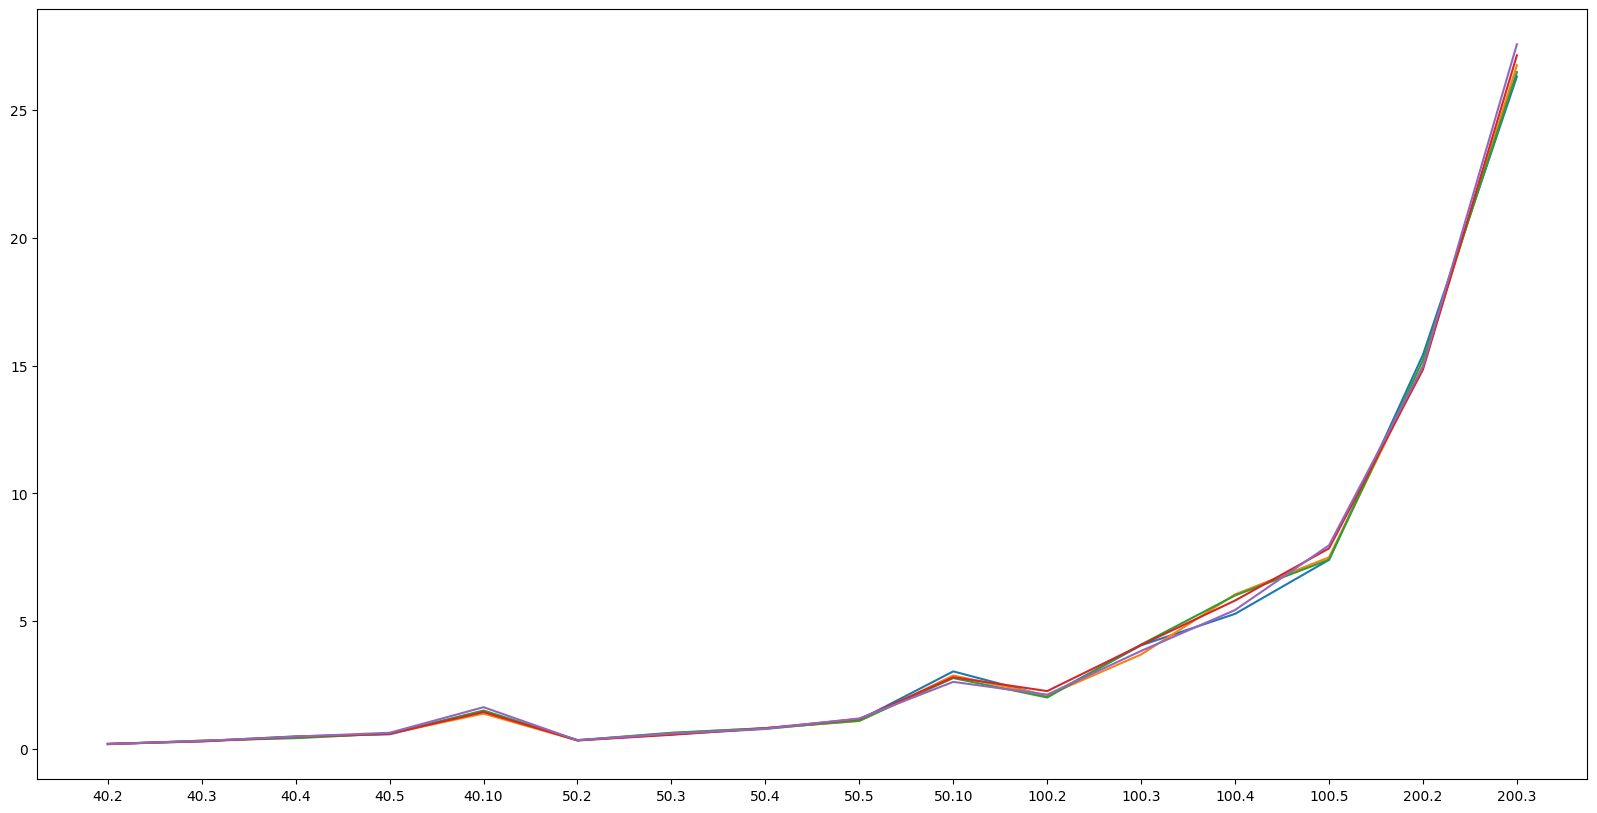

In [21]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)


plt.plot(ten_best_per_time.iloc[:-1, 0])
plt.plot(ten_best_per_time.iloc[:-1, 1])
plt.plot(ten_best_per_time.iloc[:-1, 2])
plt.plot(ten_best_per_time.iloc[:-1, 3])
plt.plot(ten_best_per_time.iloc[:-1, 4])


In [22]:
time_table.sort_values(by='mean', axis=1).to_csv("vnd_best_per_time.csv", index_label='problem')

In [23]:
ten_best_dev = deviation_table.sort_values(by='mean', axis=1).iloc[:, : 10]
ten_best_dev

,VND first_ls kmax=3 max_iter=10 random_init - deviation (%),VND first_ls kmax=3 max_iter=10 angle_init - deviation (%),VND best_ls kmax=2 max_iter=10 random_init - deviation (%),VND best_ls kmax=3 max_iter=10 random_init - deviation (%),VND first_ls kmax=1 max_iter=10 angle_init - deviation (%),VND first_ls kmax=2 max_iter=10 random_init - deviation (%),VND best_ls kmax=2 max_iter=10 angle_init - deviation (%),VND best_ls kmax=1 max_iter=10 angle_init - deviation (%),VND first_ls kmax=1 max_iter=10 random_init - deviation (%),VND best_ls kmax=1 max_iter=10 min_max_init - deviation (%)
40.2,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
40.3,0.000000,2.41000,2.41000,2.41000,2.41000,2.41000,2.410000,2.410000,2.410000,2.4100
40.4,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
40.5,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
40.10,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
50.2,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
50.3,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,2.220000,2.2200
50.4,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0000
50.5,0.070000,0.07000,0.07000,0.07000,0.07000,0.07000,0.070000,0.000000,0.000000,0.0700
50.10,0.140000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.140000,0.000000,0.0000


VND-ls_best-kmax=3-max_iter=10 - angle_init - deviation (%)

In [24]:
ten_best_dev.to_csv("vnd_ten_best_per_dev.csv", index_label='problem')